In [ ]:
import numpy as np
import json

# Read the word-level embeddings from the JSON file
with open('word_level_embeddings.json', 'r') as f:
    word_embeddings = json.load(f)

# Extracting the first 12 unique words and their embeddings
input_data = []
for email_embeddings in word_embeddings:
    for word, embedding in email_embeddings:
        input_data.append(embedding)

# Select the first 12 words (12*10 = 120 features)
input_data = np.array(input_data[:12])

# Convert input_data to shape (1, 120) for one email input
input_data = input_data.flatten().reshape(1, -1)  # Shape should be (1, 120)

# Define the true label for the email: 0 for not spam, 1 for spam (example)
output_label = np.array([[1]])  # Example label (1 for spam)

# Define Neural Network Architecture
input_size = 120   # 12 words * 10 dimensions per word
hidden_size = 8    # Hidden layer size
output_size = 1    # Output layer size (binary classification)

# Initialize weights using Xavier initialization (modified)
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)  # Xavier for hidden layer
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)  # Xavier for output layer
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# ReLU activation function for hidden layer
def relu(x):
    return np.maximum(0, x)  # ReLU

# Sigmoid activation function for output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward_pass(X):
    # Input to hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # ReLU activation for hidden layer

    # Hidden to output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Sigmoid activation for output layer

    return A1, A2

# Backward pass
def backward_pass(X, A1, A2, Y):
    global W1, b1, W2, b2

    # Output layer error
    output_error = A2 - Y
    dW2 = np.dot(A1.T, output_error)
    db2 = np.sum(output_error, axis=0, keepdims=True)

    # Hidden layer error
    hidden_error = np.dot(output_error, W2.T) * (A1 > 0)  # Derivative of ReLU
    dW1 = np.dot(X.T, hidden_error)
    db1 = np.sum(hidden_error, axis=0, keepdims=True)

    # Gradient clipping (to prevent gradients from exploding)
    max_grad_norm = 1.0  # Set maximum gradient norm
    np.clip(dW1, -max_grad_norm, max_grad_norm, out=dW1)
    np.clip(db1, -max_grad_norm, max_grad_norm, out=db1)
    np.clip(dW2, -max_grad_norm, max_grad_norm, out=dW2)
    np.clip(db2, -max_grad_norm, max_grad_norm, out=db2)

    # Update weights and biases (gradient descent)
    learning_rate = 0.001  # Lower the learning rate
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Training the neural network (just one iteration for simplicity)
for epoch in range(1000):  # Train for 1000 iterations (epochs)
    # Forward pass
    A1, A2 = forward_pass(input_data)

    # Backward pass (update weights)
    backward_pass(input_data, A1, A2, output_label)

    # Optional: Print the loss every 100 epochs
    if epoch % 100 == 0:
        loss = np.mean((A2 - output_label) ** 2)  # Mean Squared Error loss
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test the trained neural network (prediction)
A1, A2 = forward_pass(input_data)
prediction = A2 > 0.5  # Binary classification (0 or 1)

print(f"Predicted Output: {prediction[0][0]}")


Epoch 0, Loss: 0.0451
Epoch 1, Loss: 0.0445
Epoch 2, Loss: 0.0439
Epoch 3, Loss: 0.0433
Epoch 4, Loss: 0.0428
Epoch 5, Loss: 0.0422
Epoch 6, Loss: 0.0417
Epoch 7, Loss: 0.0411
Epoch 8, Loss: 0.0406
Epoch 9, Loss: 0.0401
Predicted Output: True


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


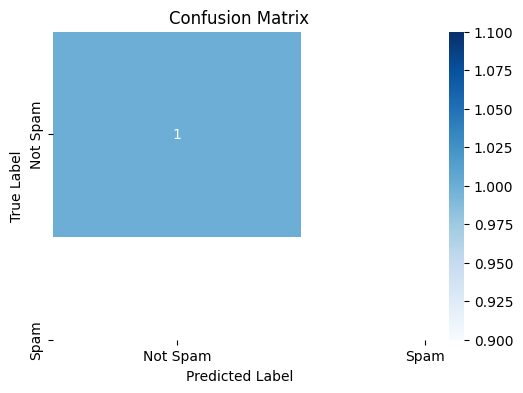

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


predicted_output = A2 > 0.5  # Binary classification output: 1 for spam, 0 for not spam
true_output = output_label  # True label (1 for spam, 0 for not spam)

# Convert predicted and true labels to binary format (0 or 1)
predicted_output = predicted_output.astype(int)
true_output = true_output.astype(int)

# Calculate accuracy
accuracy = accuracy_score(true_output, predicted_output)

# Calculate precision
precision = precision_score(true_output, predicted_output)

# Calculate recall
recall = recall_score(true_output, predicted_output)

# Calculate F1 score
f1 = f1_score(true_output, predicted_output)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(true_output, predicted_output)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import numpy as np
import json
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load CSV for true labels
def load_csv_labels(csv_file):
    """
    Load email content and labels from a CSV file.
    :param csv_file: Path to the CSV file containing email data and labels.
    :return: DataFrame with email content and labels.
    """
    return pd.read_csv(csv_file)

# Load JSON embeddings
def load_json_embeddings(json_file):
    """
    Load embeddings from a JSON file.
    :param json_file: Path to the JSON file containing embeddings.
    :return: A list of emails, each containing words and their embeddings.
    """
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

# Function to process 12 words for one email
def process_email(email_embeddings):
    """
    Extract the embeddings of 12 words from a single email.
    :param email_embeddings: List of (word, embedding) tuples for an email.
    :return: Flattened embedding vector for 12 words.
    """
    embeddings = [embedding for _, embedding in email_embeddings[:12]]  # Extract embeddings for the first 12 words
    return np.array(embeddings).flatten().reshape(1, -1)  # Shape to (1, 120)

# Neural Network Parameters
input_size = 120   # 12 words * 10 dimensions per word
hidden_size = 8    # Hidden layer size
output_size = 1    # Binary classification (spam/not spam)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward_pass(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A1, A2

# Backward pass
def backward_pass(X, A1, A2, Y, learning_rate=0.001):
    global W1, b1, W2, b2
    output_error = A2 - Y
    dW2 = np.dot(A1.T, output_error)
    db2 = np.sum(output_error, axis=0, keepdims=True)
    hidden_error = np.dot(output_error, W2.T) * (A1 > 0)
    dW1 = np.dot(X.T, hidden_error)
    db1 = np.sum(hidden_error, axis=0, keepdims=True)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Load data
embeddings_file = 'word_level_embeddings.json'
labels_csv_file = 'NLP.csv'

email_embeddings = load_json_embeddings(embeddings_file)
email_data = load_csv_labels(labels_csv_file)

# Extract true labels from the CSV
true_labels = email_data['label'].tolist()  # Assume 'label' column contains 1 for spam, 0 for not spam

# Training the model
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for i, email in enumerate(email_embeddings):
        # Process the first 12 words of the email
        input_data = process_email(email)
        output_label = np.array([[true_labels[i]]])  # True label dynamically fetched for the email

        # Forward pass
        A1, A2 = forward_pass(input_data)

        # Backward pass
        backward_pass(input_data, A1, A2, output_label)

        # Calculate loss
        loss = np.mean((A2 - output_label) ** 2)  # Mean Squared Error loss
        total_loss += loss
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

# Testing and evaluation
predictions = []
for i, email in enumerate(email_embeddings):
    # Process the first 12 words of the email
    input_data = process_email(email)

    # Forward pass
    _, A2 = forward_pass(input_data)
    predictions.append(int(A2 > 0.5))  # Convert sigmoid output to binary prediction

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


IndexError: list index out of range